# -------PCA PART

Associated business report: https://docs.google.com/document/d/1VUGCG6fvwp3DqvFEuD3SpXgnszFDy_rYot0aXkuky4o/edit?usp=sharing

# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# READING DATASET

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Factor-Hair-Revised (1).csv")

# INITIAL ANALYSIS

In [ ]:
# Checking the first 5 rows of the dataframe
df.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [ ]:
#Let's check the shape of the dataframe
df.shape

(100, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [ ]:
df.describe()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,7.810000,3.672000,5.365000,5.442000,4.010000,5.805000,5.12300,6.974000,6.043000,4.27800,3.886000,6.918000
std,29.011492,1.396279,0.700516,1.530457,1.208403,1.126943,1.315285,1.07232,1.545055,0.819738,0.92884,0.734437,1.191839
min,1.000000,5.000000,2.200000,1.300000,2.600000,1.900000,2.300000,2.90000,3.700000,4.100000,2.00000,1.600000,4.700000
25%,25.750000,6.575000,3.275000,4.250000,4.600000,3.175000,4.700000,4.50000,5.875000,5.400000,3.70000,3.400000,6.000000
50%,50.500000,8.000000,3.600000,5.400000,5.450000,4.000000,5.750000,4.90000,7.100000,6.100000,4.40000,3.900000,7.050000
75%,75.250000,9.100000,3.925000,6.625000,6.325000,4.800000,6.800000,5.80000,8.400000,6.600000,4.80000,4.425000,7.625000
max,100.000000,10.000000,5.700000,8.500000,7.800000,6.500000,8.400000,8.20000,9.900000,8.100000,6.70000,5.500000,9.900000


# TIME FOR SOME EXPLORATORY DATA ANALYSIS

In [ ]:
df['SalesFImage'].value_counts().min()

1

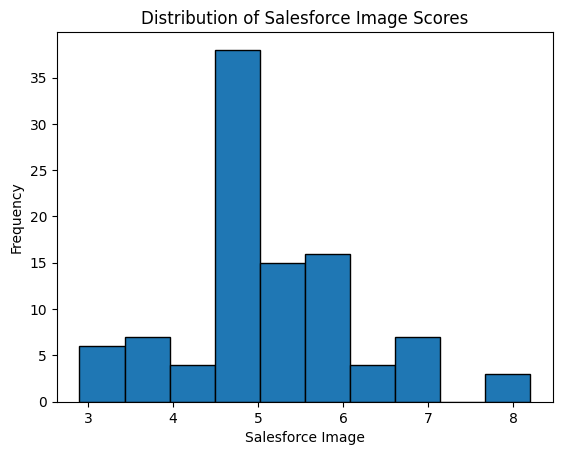

In [ ]:
# 1. What is the distribution of 'Salesforce Image' scores?
import matplotlib.pyplot as plt
plt.hist(df['SalesFImage'], bins='auto', edgecolor='k')
plt.xlabel('Salesforce Image')
plt.ylabel('Frequency')
plt.title('Distribution of Salesforce Image Scores')
plt.show()

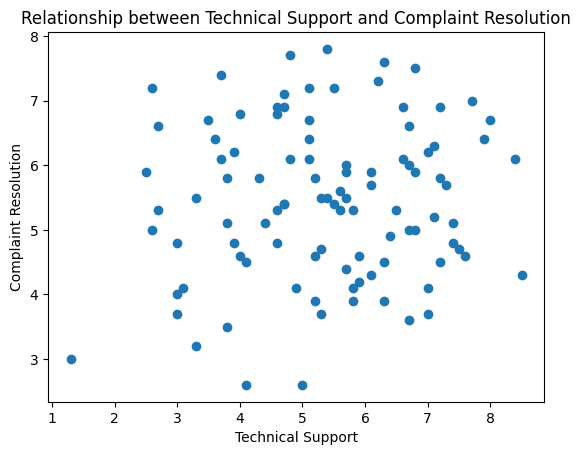

In [ ]:
# 2. How does 'Technical Support' relate to 'Complaint Resolution'? (Scatter plot)
plt.scatter(df['TechSup'], df['CompRes'])
plt.xlabel('Technical Support')
plt.ylabel('Complaint Resolution')
plt.title('Relationship between Technical Support and Complaint Resolution')
plt.show()

In [ ]:
df['TechSup'].corr(df['CompRes'])

0.096656597778459

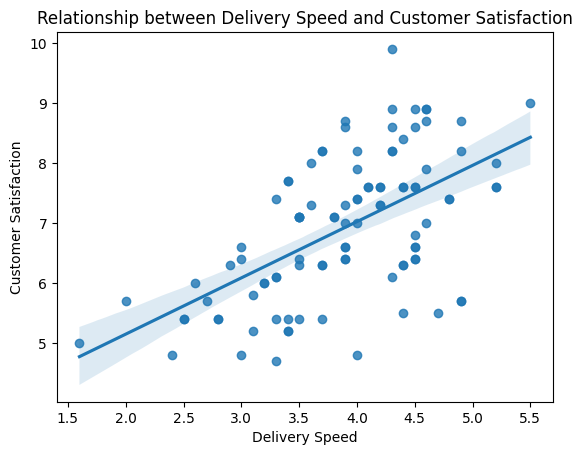

In [ ]:
# 3. How does 'Delivery Speed' relate to 'Customer satisfaction'? (Scatter plot)
sns.regplot(x='DelSpeed', y='Satisfaction', data=df)
plt.xlabel('Delivery Speed')
plt.ylabel('Customer Satisfaction')
plt.title('Relationship between Delivery Speed and Customer Satisfaction')
plt.show()

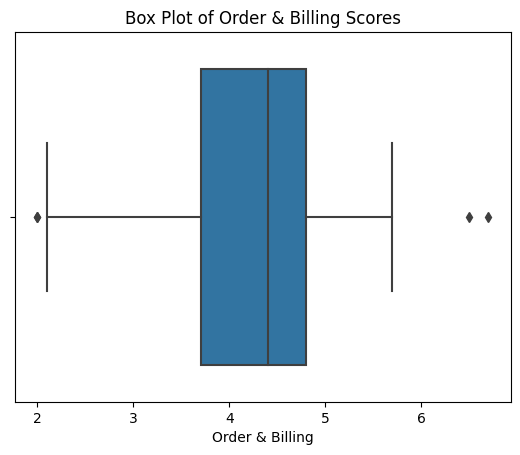

In [ ]:
sns.boxplot(x=df['OrdBilling'])
plt.xlabel('Order & Billing')
plt.title('Box Plot of Order & Billing Scores')
plt.show();

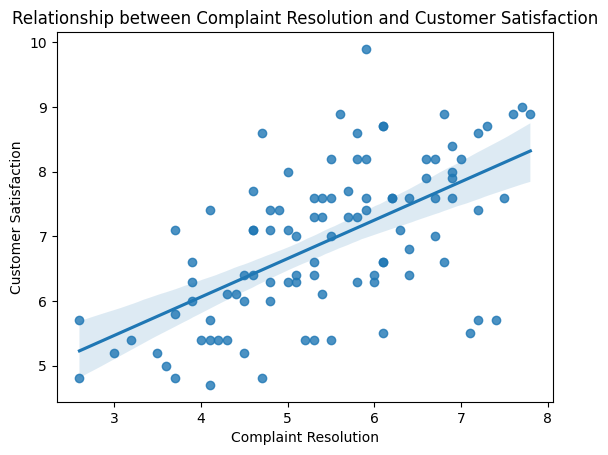

In [ ]:
# 3. How does 'Complaint Resolution' relate to 'Customer satisfaction'? (Scatter plot)
sns.regplot(x='CompRes', y='Satisfaction', data=df)
plt.xlabel('Complaint Resolution')
plt.ylabel('Customer Satisfaction')
plt.title('Relationship between Complaint Resolution and Customer Satisfaction')
plt.show()

#QUESTION: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

ANSWER: We do not treat outliers in this case because the dataset only contains 100 rows, and in this case

# QUESTION: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

## SOLTUION:  Let's first see which columns have outliers. This will be helpful later after doing z-scaling on all columns, since then we can only plot the columns that had outliers present in them.

In [ ]:
# List of columns to check for outliers
columns_to_check = ['ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising',
                    'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling',
                    'DelSpeed', 'Satisfaction']

# Set the IQR threshold
iqr_threshold = 1.5

# List to store names of columns with outliers
columns_with_outliers = []

# Loop through each column to check for outliers using IQR method
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - iqr_threshold * IQR
    upper_bound = Q3 + iqr_threshold * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    if not outliers.empty:
        columns_with_outliers.append(column)

print("Columns with outliers are:")
print(columns_with_outliers)


Columns with outliers:
['Ecom', 'SalesFImage', 'OrdBilling', 'DelSpeed']


### 2. Z-SCALING on all columns

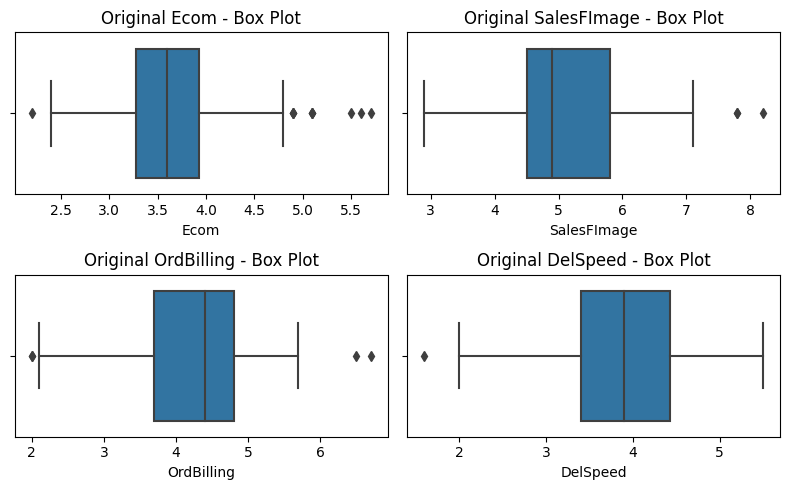

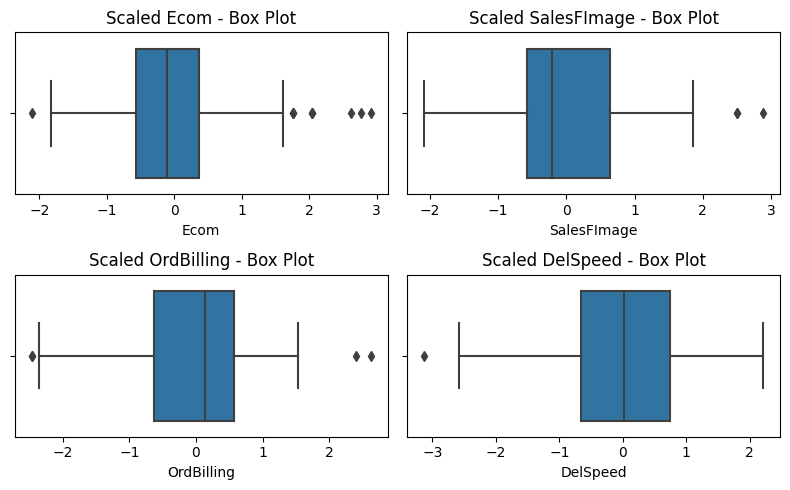

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore

# Select columns to scale
columns_to_scale = ['Ecom', 'SalesFImage', 'OrdBilling', 'DelSpeed']
# Set up larger figure size
plt.figure(figsize=(8, 5))

# Create subplots with side-by-side comparison
for i, column in enumerate(columns_to_scale, 1):
    plt.subplot(len(columns_to_scale)//2, 2, i)

    # Original data box plot
    sns.boxplot(x=df[column])
    plt.xlabel(column)
    plt.title(f'Original {column} - Box Plot')

    # Add margin around each plot
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Adjust layout
plt.tight_layout()

# Scaling using z-score method
scaled_data = df[columns_to_scale].apply(zscore)

# Set up larger figure size for scaled plots
plt.figure(figsize=(8, 5))

# Create subplots with side-by-side comparison for scaled data
for i, column in enumerate(columns_to_scale, 1):
    plt.subplot(len(columns_to_scale)//2, 2, i)

    # Scaled data box plot
    sns.boxplot(x=scaled_data[column])
    plt.xlabel(column)
    plt.title(f'Scaled {column} - Box Plot')

    # Add margin around each plot
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

# QUESTION: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

## Solution

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Select columns for PCA
columns_for_pca = ['ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising',
                   'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling',
                   'DelSpeed', 'Satisfaction']

# Create a DataFrame with the selected columns
data_for_pca = df[columns_for_pca]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Create a PCA instance
pca = PCA()

# Fit PCA to the scaled data
pca.fit(scaled_data)

# Covariance Matrix
covariance_matrix = pca.get_covariance()

# Eigenvalues and Eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Print the covariance matrix, eigenvalues, and eigenvectors
print("Covariance Matrix:")
print(covariance_matrix)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Covariance Matrix:
[[ 1.01010101e+00 -1.38548704e-01  9.65661154e-02  1.07444445e-01
  -5.40132667e-02  4.82316579e-01 -1.53346338e-01 -4.05335236e-01
   8.92043497e-02  1.05356640e-01  2.79979825e-02  4.91237372e-01]
 [-1.38548704e-01  1.01010101e+00  8.75544162e-04  1.41595213e-01
   4.34233041e-01 -5.32200387e-02  7.99539102e-01  2.31780203e-01
   5.24224157e-02  1.57724577e-01  1.93571786e-01  2.85601025e-01]
 [ 9.65661154e-02  8.75544162e-04  1.01010101e+00  9.76329270e-02
  -6.35051180e-02  1.94571168e-01  1.71621612e-02 -2.73521901e-01
   8.05220127e-01  8.09109340e-02  2.56976702e-02  1.13734524e-01]
 [ 1.07444445e-01  1.41595213e-01  9.76329270e-02  1.01010101e+00
   1.98905906e-01  5.67087831e-01  2.32072486e-01 -1.29246720e-01
   1.41826562e-01  7.64513729e-01  8.73829997e-01  6.09356166e-01]
 [-5.40132667e-02  4.34233041e-01 -6.35051180e-02  1.98905906e-01
   1.01010101e+00 -1.16674936e-02  5.47680463e-01  1.35572620e-01
   1.09010852e-02  1.86096560e-01  2.78649579e-01  3.

<hr/>

<br/>

# QUESTION: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

## Solution

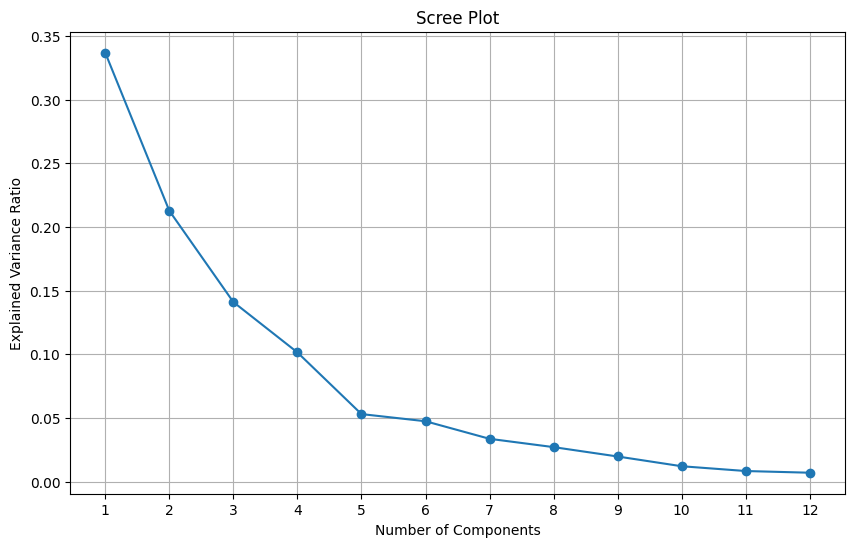

Optimal number of components to explain at least 90% variance: 7


In [ ]:
# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

# Find the number of components that explain at least 90% variance
optimal_num_components = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Optimal number of components to explain at least 90% variance: {optimal_num_components}")

# QUESTION: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

## Solution

In [ ]:
# Select columns for PCA
columns_for_pca = ['ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising',
                   'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling',
                   'DelSpeed', 'Satisfaction']

# Create a DataFrame with the selected columns
data_for_pca = df[columns_for_pca]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# Create a PCA instance
pca = PCA()

# Fit PCA to the scaled data
pca.fit(scaled_data)

# Get explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Optimal number of components to explain at least 90% variance
optimal_num_components = np.argmax(cumulative_variance >= 0.9) + 1

# Get principal components
principal_components = pca.components_

# Create a DataFrame for principal components
pc_df = pd.DataFrame(data=principal_components.T, columns=[f'PC{i+1}' for i in range(principal_components.shape[0])])

# Print explained variance ratio for each PC
print("Explained Variance Ratio for Each Principal Component:")
print(explained_variance_ratio)

# Print optimal number of components
print("\nOptimal Number of Components to Explain at least 90% Variance:", optimal_num_components)

# Print principal components
print("\nPrincipal Components:")
print(pc_df)

# Compare PCs with Actual Columns and identify the one explaining most variance
most_var_explained_pc = np.argmax(explained_variance_ratio)
most_var_explained_column = columns_for_pca[most_var_explained_pc]

print("\nPrincipal Component with Most Variance Explained:", f'PC{most_var_explained_pc+1}', f'({most_var_explained_column})')

# Inferences about principal components
for i, column in enumerate(columns_for_pca):
    print(f"\nInferences about {column} (PC{i+1}):")
    weights = pc_df[f'PC{i+1}']
    sorted_weights = weights.abs().sort_values(ascending=False)
    top_weights = sorted_weights[:3]
    for index, weight in top_weights.items():
        print(f"   - {df.columns[index+1]}: {weight:.4f}")


Explained Variance Ratio for Each Principal Component:
[0.336905   0.2127437  0.14101868 0.1014622  0.05299691 0.04737761
 0.03356898 0.02704001 0.01967829 0.01201863 0.00826154 0.00692845]

Optimal Number of Components to Explain at least 90% Variance: 7

Principal Components:
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  -0.158551 -0.313132  0.073561  0.614071 -0.249645  0.364995  0.126408   
1  -0.166186  0.440593 -0.236520  0.196282 -0.188869 -0.465405  0.008248   
2  -0.125143 -0.238290 -0.616312 -0.179414 -0.039771  0.123928 -0.013461   
3  -0.422633  0.001341  0.196654 -0.279705 -0.033409  0.014952 -0.004638   
4  -0.180761  0.357245 -0.089867  0.206000  0.761076  0.418908 -0.071551   
5  -0.352839 -0.297787  0.111227  0.100088  0.025061 -0.195823 -0.633979   
6  -0.217950  0.464889 -0.240942  0.199488 -0.142092 -0.167118  0.021650   
7   0.134837  0.417763  0.051667 -0.240795 -0.489648  0.585575 -0.342805   
8  -0.174991 -0.201184 -0.605460 -0.1

# QUESTION: Write linear equation for first PC.

# Solution

In [ ]:
# Get the loadings for the first principal component
loadings_pc1 = pca.components_[0]

# Create the linear equation for the first principal component
linear_equation_pc1 = 'PC1 = '
for i, column_name in enumerate(columns_for_pca):
    linear_equation_pc1 += f'{loadings_pc1[i]:.4f} * {column_name}'
    if i < len(columns_for_pca) - 1:
        linear_equation_pc1 += ' + '

print("Linear Equation for the First Principal Component (PC1):")
print(linear_equation_pc1)


Linear Equation for the First Principal Component (PC1):
PC1 = -0.1586 * ProdQual + -0.1662 * Ecom + -0.1251 * TechSup + -0.4226 * CompRes + -0.1808 * Advertising + -0.3528 * ProdLine + -0.2179 * SalesFImage + 0.1348 * ComPricing + -0.1750 * WartyClaim + -0.3880 * OrdBilling + -0.4223 * DelSpeed + -0.4130 * Satisfaction
